In [44]:
import pandas as pd 

import sys
module_dir = 'C:\\Users\\Hideki\\Documents\\Projects\\MestradoOpen\\script'
sys.path.append(module_dir)

from performance_tracker import PerformanceTracker

In [45]:
df = pd.read_excel("../data/base_dados2all.xlsx", index_col="Date")
df = df.pct_change()

In [50]:
transaction_cost = 0.00065
bova11 = df["BOVA11"]
naive = df[[col for col in df.columns if col[-2:] != "11"]].mean(axis=1)
naive.name = "Carteira Ingênua"

In [51]:
naive = naive.transform(lambda x: (1 + x)*(1 - transaction_cost) - 1)

In [52]:
naive = naive.fillna(0)
bova11 = bova11.fillna(0)

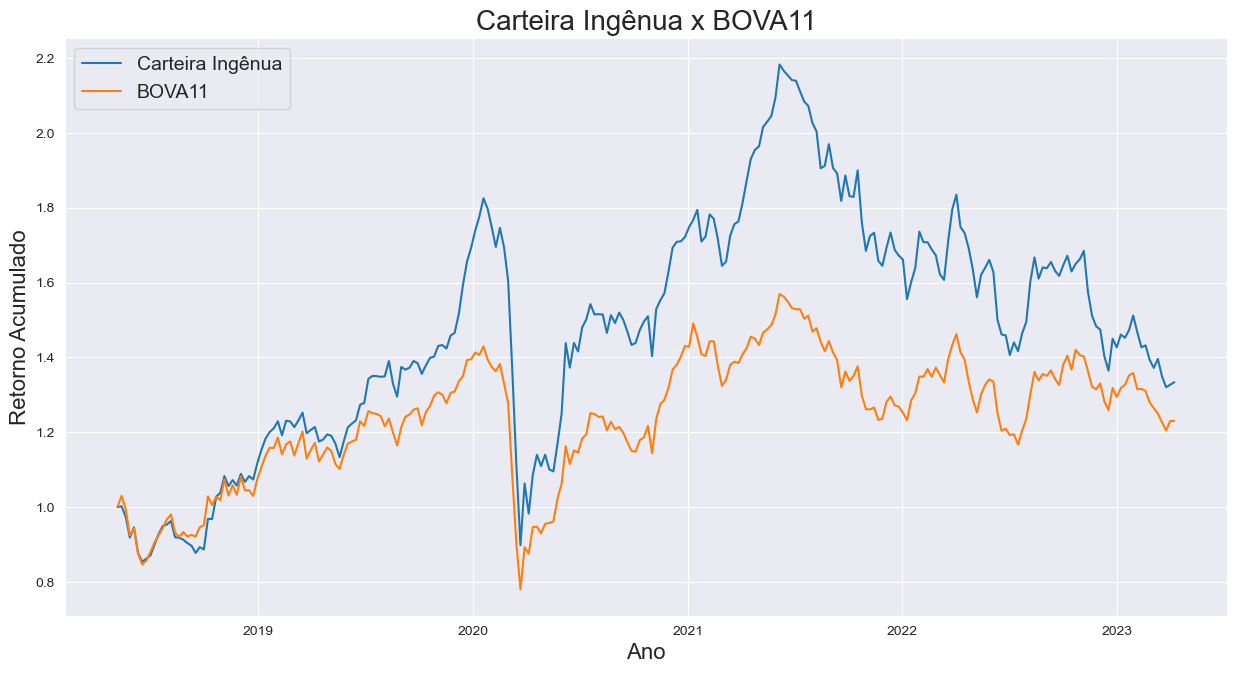

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

portfolio_cum_returns = (1 + naive).cumprod()
market_cum_returns = (1 + bova11).cumprod()
plt.figure(figsize=(15, 7.5))
plt.plot(portfolio_cum_returns.index, portfolio_cum_returns, label='Carteira Ingênua')
plt.plot(market_cum_returns.index, market_cum_returns, label='BOVA11')
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Retorno Acumulado', fontsize=16)
plt.title('Carteira Ingênua x BOVA11', fontsize=20)
plt.legend(fontsize=14, loc="upper left")
plt.savefig("../data/ibovxingenua.jpg")

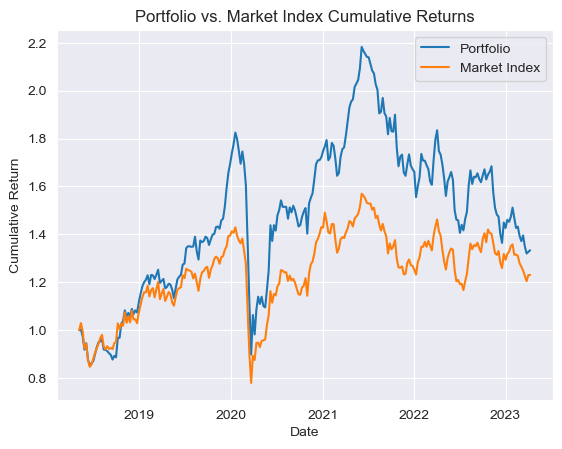

{'sharpe': -0.0009318154556190176,
 'modified_sharpe_ratio': -3.323264838933518e-05,
 'treynor_ratio': -0.024264006071858055,
 'modigliani_ratio': 1.6278744684613282,
 'max_drawdown': -50.784308547871085,
 'value_at_risk_weekly_95': -6.195071841442811,
 'media_perda_esperada_weekly_95': -10.261822669045465,
 'beta': 1.0767933397094431,
 'alpha': 1.8390922248471577,
 'annual_return': 5.973872679867154,
 'annual_std': 28.039157298039786,
 'capm_expected_return': 4.134780455019996}

In [54]:
PerformanceTracker(data_returns=naive, market_returns=bova11, annual_risk_free=6, period="weekly")()

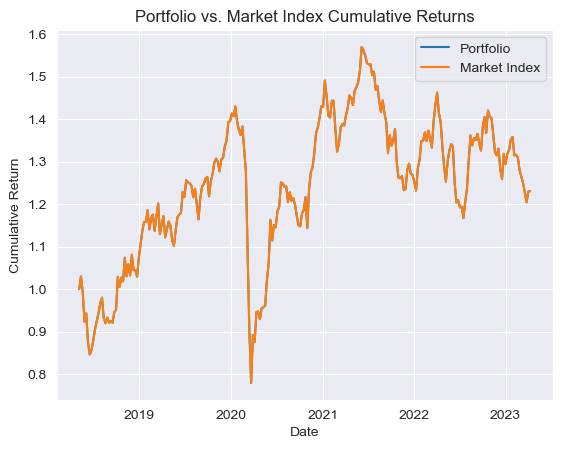

{'sharpe': -0.07261948351836417,
 'modified_sharpe_ratio': -0.0030444490800027794,
 'treynor_ratio': -1.7321982558726698,
 'modigliani_ratio': -7.949193666016738,
 'max_drawdown': -45.45375014580662,
 'value_at_risk_weekly_95': -5.294360137537417,
 'media_perda_esperada_weekly_95': -9.309071798967075,
 'beta': 0.9999999999999996,
 'alpha': 0,
 'annual_return': 4.267801744127331,
 'annual_std': 23.853078704899175,
 'capm_expected_return': 4.267801744127332}

In [55]:
PerformanceTracker(data_returns=bova11, market_returns=bova11, annual_risk_free=6, period="weekly")()